### Follow Step by step explanation.docx file too. 

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split # split train test data
from sklearn.feature_extraction.text import TfidfVectorizer #  transform the text into meaningful representation of integers
from sklearn.linear_model import PassiveAggressiveClassifier # classification algorithm
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.2, random_state = 7)

In [7]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [8]:
# Get the number of features in the tfidf_train matrix
n_features = tfidf_train.shape[1]

# Get the number of samples in the y_train vector
n_samples = y_train.shape[0]

# Divide the number of features by the number of samples
n_features_over_n_samples = n_features / n_samples
print("Number of features and number of samples:", n_features, n_samples)
print("Number of features over number of samples:", n_features_over_n_samples)

Number of features and number of samples: 61651 5068
Number of features over number of samples: 12.164759273875296


### Now select ML Model/Algorithm according to the number of features over number of samples value.

In [9]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [10]:
score

0.9289660615627466

In [11]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 42, 587]], dtype=int64)

In [12]:
##So with this model, we have 589 true positives, 587 true negatives, 41 false positives, and 49 false negatives.

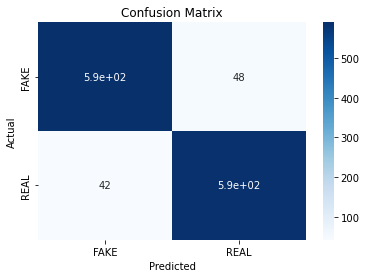

In [13]:
### My code:

import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Create a heatmap using seaborn
sns.heatmap(cm, annot = True, cmap='Blues', xticklabels = ['FAKE', 'REAL'], yticklabels = ['FAKE', 'REAL'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
